# The Gradiend Descent

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/vkr93/Data-Science-and-Machine-Learning-INDE-577---Spring-2024-/blob/main/Supervised%20Learning/2_Gradient%20Descent/The%20Gradient%20Descent%20Algorithm_vk.ipynb)

This notebook will build and implement both batch gradient descent and stochastic gradient descent models, then implement it with the [Breast Cancer](Dataset/data.csv) dataset.    

In [2]:
#Always include important packages imports at the top
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [6]:
# Load breast cancer dataset
data = load_breast_cancer()

In [7]:
#Split labels and features
X = data.data
y = data.target

In [8]:
# Standardize features using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

# Add a column of ones for the bias term
bias_column = np.ones((features_scaled.shape[0], 1))
features_with_bias = np.hstack((bias_column, features_scaled))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_with_bias, y, test_size=0.2, random_state=42)

In [10]:
# Define the cost function
def loss(X, y, w):
    """
    Calculate the mean squared error (loss)

    Parameters
    ----------
    X : numpy array, shape (m, n)
        Matrix of input features, where m is the number of examples and n is the number of features.
    y : numpy array, shape (m,)
        Vector of output labels.
    w : numpy array, shape (n,)
        Vector of model parameters.

    Returns
    -------
    J : float
        The mean squared error loss between the predicted output and the true output.
    """ 
    m = len(y)
    h = X @ w
    J = (1/(2*m)) * np.sum((h - y)**2)
    return J


# Define the gradient descent function
def gradient_descent(X, y, w, learning_rate, epochs):
    """
    Perform gradient descent to learn the parameters of model.

    Parameters
    ----------
    X : numpy array, shape (m, n)
        Matrix of input features, where m is the number of examples and n is the number of features.
    y : numpy array, shape (m,)
        Vector of output labels.
    w : numpy array, shape (n,)
        Vector of initial model parameters.
    learning_rate : float
        The step size used to update the model parameters.
    epochs : int
        The number of iterations to perform gradient descent.

    Returns
    -------
    w : numpy array, shape (n,)
        The learned model parameters.
    loss_history : numpy array, shape (epochs,)
        The history of the loss values during gradient descent
    """
    m = len(y)
    loss_history = np.zeros(epochs)
    for i in range(epochs):
        h = X @ w
        w = w - (learning_rate/m) * (X.T @ (h - y))
        loss_history[i] = loss(X, y, w)
    return w, loss_history

def predict(X, w):
    """
    Make predictions using the learned weights
    
    X : numpy array, shape (m, n)
        Matrix of input features, where m is the number of examples and n is the number of features.
    w : numpy array, shape (n,)
        Vector of initial model parameters.
    
    Returns
    -------
    z : numpy array, shape (n,)
        The predicted label.

    """
    z = abs(np.round(np.dot(X, w)))
    return z

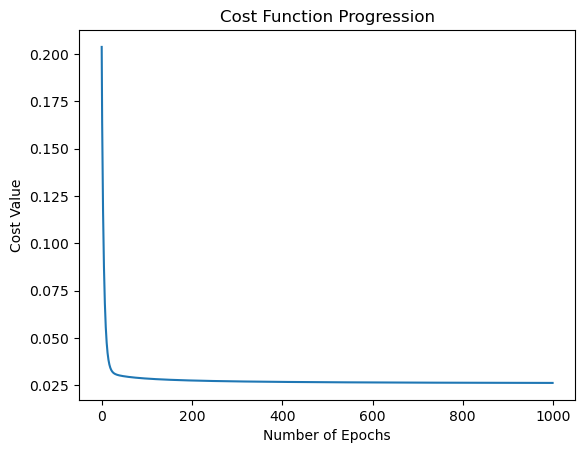

In [11]:
# Initialize parameters and hyperparameters
parameters = np.zeros(features_with_bias.shape[1])
learning_rate = 0.1
num_epochs = 1000

# Run gradient descent on the training dataset
final_weights, cost_progress = gradient_descent(
    X_train, y_train, parameters, learning_rate, num_epochs)

# Visualize the cost function over the training epochs
plt.plot(range(num_epochs), cost_progress)
plt.xlabel('Number of Epochs')
plt.ylabel('Cost Value')
plt.title('Cost Function Progression')
plt.show()


In [13]:
# Evaluate the model on the test set
y_pred = predict(X_test, final_weights)
accuracy = accuracy_score(y_test, y_pred)
print('Testing Accuracy: {:.2f}%'.format(accuracy*100))

Testing Accuracy: 95.61%


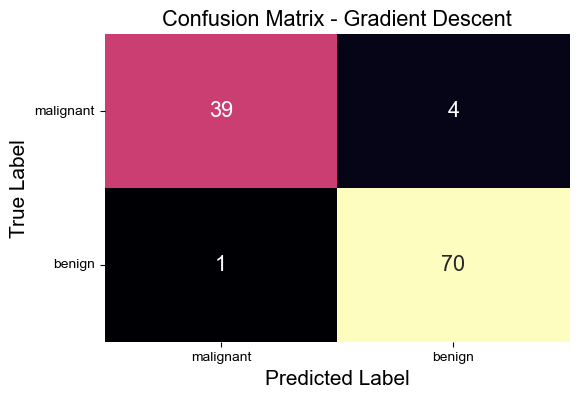

In [14]:
# Import metrics from sklearn 
from sklearn import metrics

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#Plot confusion matrix
plt.figure(figsize=(6, 4))
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)
ax.set_title("Confusion Matrix - Gradient Descent")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["malignant", "benign"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["malignant", "benign"], rotation=0)
plt.show()

In [15]:
from sklearn.metrics import classification_report
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Conclusion

The model evaluation shows that gradient descent is capable of predicting the type of tumor with a very high accuracy. A summary of the results obtained is: The gradient descent is able to achieve a testing accuracy of 96%.
The precision of the gradient descent is 97% and 95% respectively for malignant and benign tumors.